In [65]:
import numpy as np
import pandas as pd
import plotnine as gg
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
df = pd.read_csv("../data/bicikelj_preprocessed_new.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [67]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'timestamp', 'station', 'target',
       'time_of_day_sin', 'time_of_day_cos', 'temperature', 'precipitation',
       'snow_depth', 'cloud_cover', 'is_day', 'praznik', 'poletne_pocitnice',
       'zimske_pocitnice', 'yesterday', 'day_of_week', 'daily_lag_1', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'number_x', 'contract_name_x',
       'name', 'address_x', 'banking_x', 'bonus_x', 'bike_stands_x',
       'available_bike_stands_x', 'available_bikes_x', 'status_x',
       'last_update_x', 'position_lat_x', 'position_lon_x',
       'distance_to_center', 'is_weekend', 'number_y', 'contract_name_y',
       'address_y', 'banking_y', 'bonus_y', 'bike_stands_y',
       'available_bike_stands_y', 'available_bikes_y', 'status_y',
       'last_update_y', 'position_lat_y', 'position_lon_y',
       'num_bus_stations'],
      dtype='object')

In [68]:
# df["is_rain"] = df["precipitation"] > 0
df["station"] = df["station"].astype("category")
df = pd.get_dummies(df, columns=["station"])

In [69]:
cutoff_time = df["timestamp"].max() - pd.Timedelta(days=7)
train_df = df[df["timestamp"] <= cutoff_time]
test_df = df[df["timestamp"] > cutoff_time]

In [70]:
columns = ["Unnamed: 0", "zimske_pocitnice", 'number_x', 'contract_name_x',
       'name', 'address_x', 'banking_x', 'bonus_x',
       'available_bike_stands_x', 'available_bikes_x', 'status_x',
       'last_update_x', 'position_lat_x', 'position_lon_x', 'number_y', 'contract_name_y',
       'address_y', 'banking_y', 'bonus_y', 'bike_stands_y',
       'available_bike_stands_y', 'available_bikes_y', 'status_y',
       'last_update_y', 'position_lat_y', 'position_lon_y', "yesterday"]

train_df = train_df.drop(columns=columns)
test_df = test_df.drop(columns=columns)

In [71]:
X_train, y_train = train_df.drop(columns=["target", "timestamp"], axis=1), train_df['target']
X_test, y_test = test_df.drop(columns=["target", "timestamp"], axis=1), test_df['target']

In [72]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [73]:
print(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))

0.558456726929599
0.2715879079809522


In [74]:
pd.DataFrame({"feature": X_train.columns.tolist(), "importance": model.feature_importances_}).sort_values("importance", ascending=False)

,feature,importance
12,lag_1,0.968840
73,station_RAKOVNIK,0.001907
44,station_IKEA,0.001641
66,station_POLJANSKA-POTOČNIKOVA,0.001266
64,station_PLEČNIKOV STADION,0.001158
...,...,...
67,station_POLJE,0.000000
88,station_TRNOVO,0.000000
69,station_POVŠETOVA-GRABLOVIČEVA,0.000000
71,station_PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE,0.000000


In [75]:
test_df

,Unnamed: 0.1,timestamp,target,time_of_day_sin,time_of_day_cos,temperature,precipitation,snow_depth,cloud_cover,is_day,...,station_VOJKOVA - GASILSKA BRIGADA,station_VOKA - SLOVENČEVA,station_ZALOG,station_ZALOŠKA C.-GRABLOVIČEVA C.,station_ČRNUČE,station_ŠMARTINSKI PARK,station_ŠPICA,station_ŠPORTNI CENTER STOŽICE,station_ŠTEPANJSKO NASELJE 1-JAKČEVA ULICA,station_ŽIVALSKI VRT
5809,5809,2022-09-25 02:38:00,0,0.636078,0.771625,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5810,5810,2022-09-25 02:44:00,0,0.656059,0.754710,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5811,5811,2022-09-25 02:48:00,0,0.669131,0.743145,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5812,5812,2022-09-25 02:55:00,0,0.691513,0.722364,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5813,5813,2022-09-25 02:58:00,0,0.700909,0.713250,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558502,558502,2022-10-01 18:03:00,12,-0.999914,0.013090,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,True
558503,558503,2022-10-01 18:07:00,12,-0.999534,0.030539,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,True
558504,558504,2022-10-01 18:13:00,12,-0.998392,0.056693,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,True
558505,558505,2022-10-01 18:16:00,12,-0.997564,0.069756,14.9,0.0,0.0,31.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [76]:
plot_df = test_df[["timestamp", "target"]].copy()
plot_df["y_pred"] = y_pred

In [77]:
one_day_data = plot_df[(test_df["timestamp"] > pd.Timestamp("2022-09-25 06:00:01")) & (test_df["timestamp"] < pd.Timestamp("2022-09-26 09:00:01")) & test_df["station_LIDL BEŽIGRAD"]]

In [78]:
one_day_data = pd.melt(one_day_data, id_vars=['timestamp'], value_vars=['target', 'y_pred'], var_name='type', value_name='value')

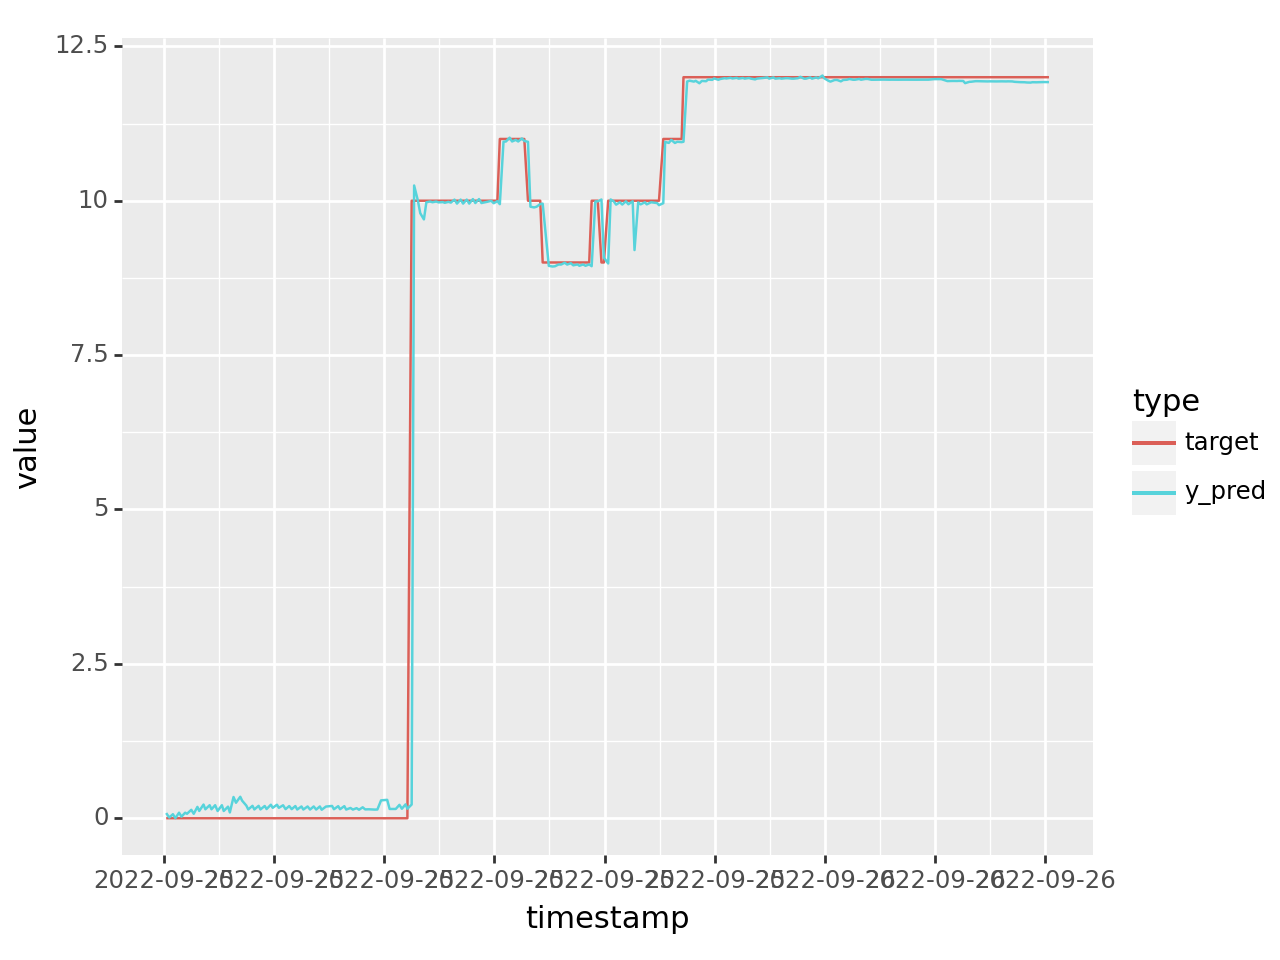

<Figure Size: (640 x 480)>

In [79]:
gg.ggplot(one_day_data, gg.aes(x="timestamp", y="value", color="type")) + gg.geom_line()